## **Task 2 e 3: Obiettivi**
- Verificare la corretta installazione del modulo tdwf;
- Eseguire una misura cortocircuitando Ch1+ e Ch1-;
- Eseguire una misura lasciando Ch1+ flottante e toccandolo con un dito;
- Considerazioni sulla risoluzione al variare dei parametri di acquisizione.

In [4]:
import tdwf # importiamo il modulo...
import matplotlib.pyplot as plt
import numpy as np
import time

ad2 = tdwf.AD2() # connessione all’hardware
 
 
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio

Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1


Dispositivo #1 [SN:210321B5D136, hdwf=1] connesso!
Configurazione #1
[-5.23866358e-02 -5.03747352e-02 -5.30572693e-02 -5.07100520e-02
 -4.93687849e-02 -1.41848845e-03 -5.10697280e-03 -3.89739654e-02
 -4.77165604e-03 -3.43038900e-03 -2.89144627e-02 -9.13077390e-03
 -1.75380521e-03 -2.35493945e-02 -1.01367242e-02 -1.41848845e-03
  3.81488891e-02  3.71429388e-02  3.34544545e-02 -5.23866358e-02
 -5.33925860e-02 -4.93687849e-02 -4.70215676e-02 -5.00394185e-02
 -4.86981514e-02 -7.45419011e-03 -4.29977665e-02 -6.11292307e-03
 -4.12538174e-04 -3.29382638e-02 -7.78950687e-03 -4.12538174e-04
 -2.45553448e-02 -1.24839415e-02 -1.75380521e-03  3.74782556e-02
  3.44604047e-02  3.41250880e-02 -5.07100520e-02 -5.47338531e-02
 -5.13806855e-02 -5.00394185e-02 -4.73568844e-02 -5.07100520e-02
 -1.14779912e-02 -4.33330833e-02  5.93412102e-04 -5.77760631e-03
 -3.46148476e-02 -5.44228955e-03 -3.43038900e-03 -2.65672454e-02
 -9.46609066e-03 -3.43038900e-03 -1.95255934e-02 -1.14779912e-02
  3.74782556e-02  3.6

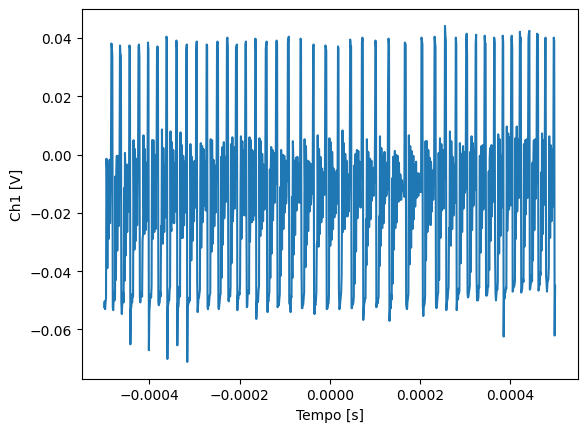

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile.txt", data, delimiter="\t")

plt.show()

Ci aspettiamo misure vicine a 0 perché stiamo misurando la ddp su un corto circuito. Otteniamo misura molto rumorosa (giustificato, probabilmente, dal fatto che il corto circuito non è collegato a terra), con range di variabilità dato da +/- 0.02V.

[ 3.46975624e-01  3.92914020e-01 -1.18475133e+00 -1.41746116e+00
 -1.46272892e+00 -1.47748286e+00 -1.47077653e+00 -1.46440551e+00
 -1.49793718e+00 -7.05583682e-01 -8.99061451e-01 -1.21895364e+00
 -7.98131107e-01 -8.06514026e-01 -1.13311255e+00 -2.27421984e-01
  3.31551053e-01  3.81848567e-01 -1.18676323e+00 -1.41008419e+00
 -1.45166347e+00 -1.46071702e+00 -1.48083603e+00 -1.48720705e+00
 -1.48251261e+00 -7.50516127e-01 -7.79018052e-01 -1.19648742e+00
 -8.59829391e-01 -7.43809792e-01 -1.10259872e+00 -2.08668605e-02
  3.58711710e-01  3.95931871e-01 -1.21560047e+00 -1.41779648e+00
 -1.45099284e+00 -1.45836980e+00 -1.48284793e+00 -1.47580628e+00
 -1.45971107e+00 -8.15902895e-01 -7.43474475e-01 -1.19984058e+00
 -9.14486022e-01 -7.12960650e-01 -1.07242022e+00 -9.76854939e-01
 -7.62252214e-01  2.74211887e-01  3.60388294e-01 -5.78163313e-01
 -1.40069532e+00 -1.47983008e+00 -1.51101454e+00 -1.52342126e+00
 -1.52811569e+00 -1.53113354e+00 -8.97384868e-01 -1.30580068e+00
 -8.74248011e-01 -7.71976

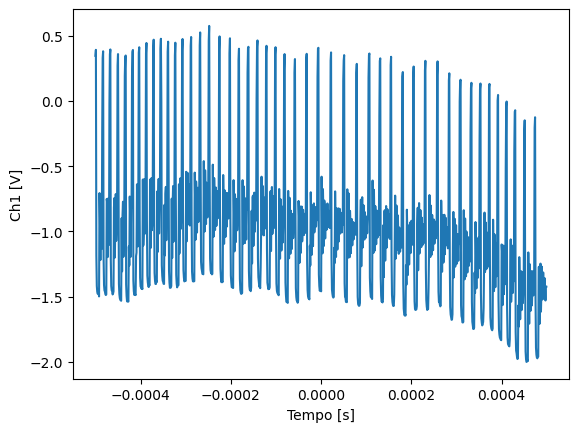

In [6]:
scope = tdwf.Scope(ad2.hdwf) # inizializzazione oscilloscopio
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Nell'acquisizione con Ch1+ flottante, ci aspettiamo un segnale DC con sovrapposto rumore a 50Hz, ma si registrano oscillazioni smorzate periodiche.
Abbiamo aggiunto dopo la funzione scope.sample() la funzione time.sleep(0.5) per tagliare acquisizioni in cui si vedeva il transiente necessario ad AD2 per stabilizzarsi (tale intervallo assomigliava ad una carica di un condensatore, con sovrapposte le stesse oscillazioni smorzate, cfr. fig.3), a seguito del quale si registra anche una diminuzione in ampiezza degli spikes di circa metà.

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[-0.20030184 -0.06338085 -0.02999371 -0.16387951 -0.10014043 -0.03775032
 -0.12644544 -0.11936332 -0.05191456 -0.10722255  0.55040294  0.57974315
  0.57097481 -0.50179784 -0.51697381 -0.49370398 -0.4738066  -0.48493564
 -0.4953902   0.01890665 -0.37027274 -0.12779442  0.06106213 -0.22019923
 -0.1753458   0.02531428 -0.13858622 -0.19085902 -0.00537491 -0.08833689
 -0.19423146 -0.04618141 -0.06709053 -0.17703202 -0.0853017  -0.07248643
  0.63100421  0.65292506  0.63336492 -0.52810285 -0.53518498 -0.52439317
 -0.51157791 -0.50213508 -0.50449579  0.0570152  -0.18006721 -0.37971557
 -0.00368869 -0.08833689 -0.33014072 -0.06405533 -0.06236912 -0.27247203
 -0.11363018 -0.06270636 -0.23503796 -0.14398212 -0.04955385 -0.18040446
 -0.1945687  -0.09777972 -0.15477393  0.63538838  0.64685467  0.63302768
 -0.54159261 -0.56890936 -0.56992109 -0.55575685 -0.54631402 -0.54159261
 -0.08563894 -0.48729635 -0.10351286 -0.02898198 -0.376

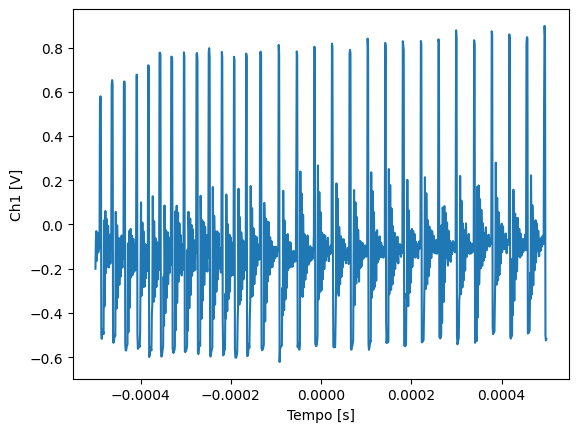

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile.txt", data, delimiter="\t")

plt.show()

Abbiamo capito che il rumore del segnale era dovuto all'alimentatore del PC, scollegato questo otteniamo un segnale di questo tipo, come ci aspettavamo:

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[-9.90737152e-04 -2.00246866e-03  2.09943594e-05 -3.35144401e-03
 -2.67695634e-03 -9.90737152e-04 -3.16249478e-04 -3.16249478e-04
 -3.16249478e-04 -3.16249478e-04 -9.90737152e-04  3.58238197e-04
  3.58238197e-04 -9.90737152e-04 -2.00246866e-03 -4.70041936e-03
 -1.66522483e-03 -2.67695634e-03  1.36996971e-03  1.36996971e-03
  2.09943594e-05 -6.53493315e-04 -1.32798099e-03 -2.33971250e-03
 -2.00246866e-03 -3.01420018e-03  3.58238197e-04  2.09943594e-05
  1.03272587e-03 -6.53493315e-04 -6.53493315e-04  2.09943594e-05
 -1.32798099e-03 -3.01420018e-03 -3.01420018e-03 -6.53493315e-04
 -1.66522483e-03 -2.33971250e-03 -9.90737152e-04 -1.66522483e-03
 -1.32798099e-03  2.09943594e-05  3.58238197e-04 -1.32798099e-03
 -2.67695634e-03  2.09943594e-05 -2.00246866e-03  3.58238197e-04
 -1.32798099e-03  2.09943594e-05 -1.66522483e-03 -4.70041936e-03
 -2.33971250e-03 -1.32798099e-03  6.95482034e-04 -1.32798099e-03
 -3.16249478e-04 -9.9

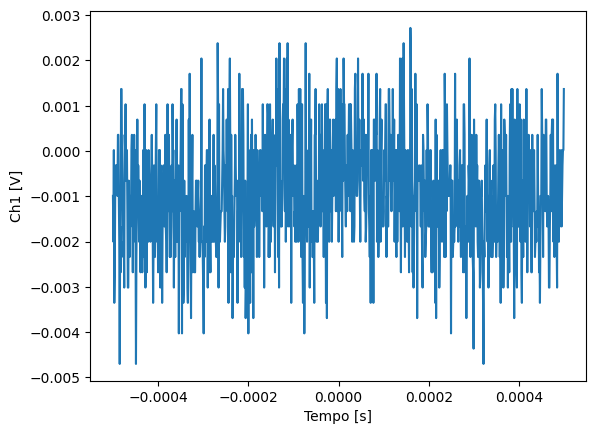

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile2.txt", data, delimiter="\t")

plt.show()

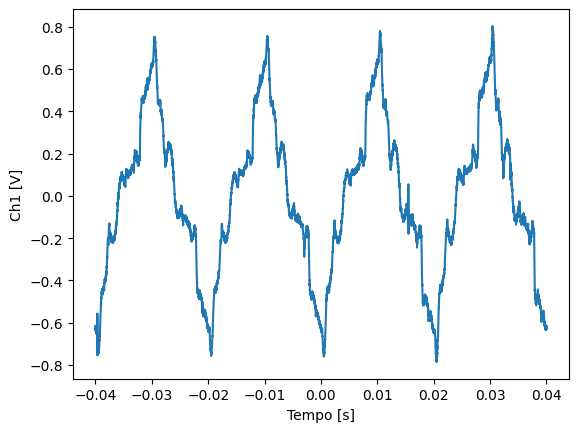

In [5]:
scope.fs = 1e5 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 8000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
 
#print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile.txt", data, delimiter="\t")

plt.show()

Qui il rumore a 50Hz è più evidente, avendo abbassato la frequenza di campionamento a 10000Sa/s e aumentando il numero di punti a 8000. In questo modo si allunga il tempo di acquisizione e dunque diventa più semplice distinguere i periodi, da cui la frequenza.
Per avere una stima approssimativa della risoluzione strumentale, plottiamo i dati in punti per vedere la discretizzazione digitale e quindi la risoluzione.

Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[ 6.95482034e-04 -6.53493315e-04 -6.53493315e-04  2.09943594e-05
  1.36996971e-03  1.03272587e-03  1.03272587e-03 -1.32798099e-03
  3.58238197e-04 -9.90737152e-04 -2.67695634e-03 -1.66522483e-03
 -1.66522483e-03 -6.53493315e-04  3.58238197e-04 -2.33971250e-03
 -2.00246866e-03 -3.68868785e-03 -9.90737152e-04 -9.90737152e-04
 -1.32798099e-03  2.09943594e-05 -6.53493315e-04 -9.90737152e-04
 -3.35144401e-03 -1.66522483e-03 -6.53493315e-04 -2.67695634e-03
 -2.00246866e-03 -1.32798099e-03 -9.90737152e-04 -2.00246866e-03
  6.95482034e-04 -3.16249478e-04 -1.66522483e-03  2.09943594e-05
 -3.16249478e-04 -6.53493315e-04  1.03272587e-03 -2.00246866e-03
 -3.16249478e-04 -2.67695634e-03  3.58238197e-04 -2.00246866e-03
  2.09943594e-05  2.09943594e-05 -2.33971250e-03 -1.32798099e-03
 -6.53493315e-04 -2.67695634e-03 -2.00246866e-03  3.58238197e-04
 -3.16249478e-04 -3.16249478e-04 -1.66522483e-03 -1.66522483e-03
 -1.32798099e-03  1.7

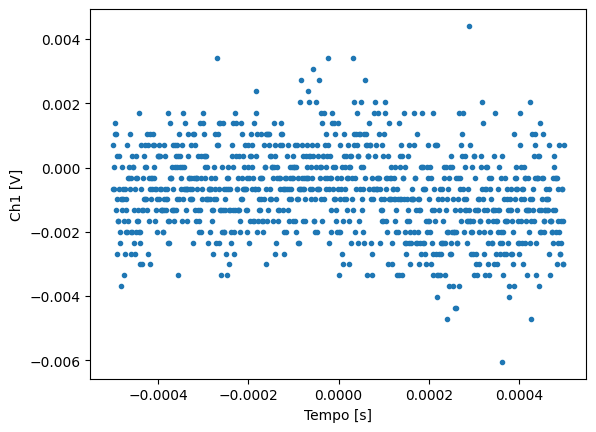

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Si vedono dunque righe orizzontali di punti e la spaziatura tra le righe, data dalla discretizzazione digitale, è proporzionale alla risoluzione strumentale. 
Infatti, le righe sono distanziate a multipli di circa 0.3mV, dato da $\frac{5V}{2^{14}}$ (dove 14 è il numero di bit con cui lavora l'ADC dell'oscilloscopio) che corrisponde alla risoluzione strumentale.
L'altra opzione di range possibile per AD2 è 50V, quindi la risoluzione aumenta di un fattore 10, e di conseguenza anche la spaziatura fra le righe, che quindi sarà circa 3mV. Si perdono dunque la maggior parte dei punti visti nel grafico precedente.

Digilent WaveForms SDK versione 3.22.2
Dispositivo #1 [SN:210321B5D8FC, hdwf=1] connesso!
Configurazione #1
[ 0.02742441  0.04225556  0.03113219  0.02000883  0.04596334  0.00146989
  0.01630104  0.01630104  0.00888547  0.04967113  0.03483998  0.02371662
  0.03854777  0.02000883  0.03113219  0.02000883  0.02000883  0.03113219
  0.04225556  0.02371662  0.02000883  0.04596334  0.02000883  0.01259325
  0.01259325  0.01630104  0.00888547  0.02000883  0.02000883  0.01259325
  0.01630104  0.00888547  0.01630104  0.02000883  0.03113219  0.02742441
  0.02742441  0.02742441  0.03113219  0.03113219  0.02371662  0.03854777
  0.04225556  0.03113219  0.00888547  0.02000883  0.01630104  0.01630104
  0.02000883  0.02742441  0.04596334  0.00888547  0.03854777  0.02742441
  0.00146989  0.02742441  0.03483998  0.01630104  0.02371662  0.03854777
  0.00517768  0.01259325  0.02371662  0.03483998  0.01630104  0.02742441
  0.03113219  0.02371662  0.02742441  0.04596334  0.02742441  0.01259325
 -0.0022379   0.

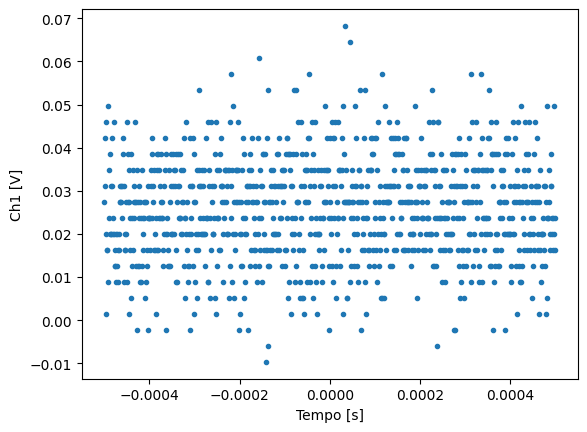

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 50 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch2.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile1.txt", data, delimiter="\t")

plt.show()

Avendo dato ad AD2 50V di range riesce a misurare anche voltaggi più alti, quindi mi ritrovo con un segnale più alto in Volt, con righe equispaziate tra loro a multipli interi di circa 3mV

Dispositivo #1 [SN:210321B5D136, hdwf=2] connesso!
Configurazione #1
[ 9.28728861e-04  2.58095343e-04  2.58095343e-04  1.59936238e-03
  5.93412102e-04 -7.72214153e-05  2.58095343e-04  9.28728861e-04
  5.93412102e-04 -4.12538174e-04  2.58095343e-04  5.93412102e-04
  2.58095343e-04  2.58095343e-04  2.58095343e-04  1.26404562e-03
  5.93412102e-04  1.59936238e-03  2.58095343e-04  5.93412102e-04
  9.28728861e-04  2.58095343e-04  2.58095343e-04  2.58095343e-04
  5.93412102e-04 -7.72214153e-05  2.58095343e-04  2.58095343e-04
  2.58095343e-04  2.58095343e-04  9.28728861e-04  2.58095343e-04
  2.58095343e-04  9.28728861e-04  5.93412102e-04 -4.12538174e-04
 -4.12538174e-04  1.26404562e-03  2.58095343e-04  9.28728861e-04
  2.58095343e-04 -7.72214153e-05 -7.72214153e-05  5.93412102e-04
 -7.72214153e-05 -7.72214153e-05  2.58095343e-04  9.28728861e-04
 -7.47854933e-04 -4.12538174e-04 -7.72214153e-05  9.28728861e-04
  9.28728861e-04  2.58095343e-04  2.58095343e-04 -7.72214153e-05
  5.93412102e-04  2.5

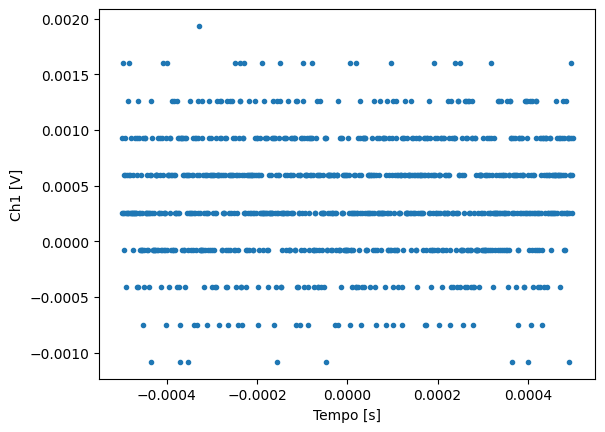

In [ ]:
scope.fs = 1e6 # => frequenza di sampling impostata a 1MSa/s
scope.npt = 1000 # => acquisizione impostata a 1000 punti
 
scope.ch1.rng = 5 # range Ch1 su [-2.5,+2.5]
scope.ch2.rng = 50 # range Ch2 su [-25,+25]
 
 
scope.ch1.avg = True # attiva media su Ch2
scope.sample() # Avvio acquisizione
time.sleep(0.5)
 
print(scope.ch1.vals) # stampa su shell 

plt.plot(scope.time.vals, scope.ch1.vals, '.')
plt.xlabel("Tempo [s]")
plt.ylabel("Ch1 [V]")

data = np.column_stack((scope.time.vals,scope.ch1.vals,scope.ch2.vals))
np.savetxt("nomefile3.txt", data, delimiter="\t")

plt.show()

Come atteso, non c'è nessuna variazione della risoluzione strumentale ma, mediando, si guadagna in precisione e diminuisce lo spread.
In generale, sul datasheet dell'AD2 (alla voce "Analog Input (Scope)"), si legge "500uV to 5V/division". Nel programma Waveforms si visualizzano 10 divisioni sulla finestra dell'oscilloscopio: questo significa che quando rng è impostato su 5V, si visualizzano i valori con a 50mV/div; quando rng = 50V, a 5V/div.  